In [275]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import linear_regression
from scipy.stats import norm
from sklearn import datasets
%matplotlib inline

In [276]:
def log_loss_and_grad(w, X, target):
    m = X.shape[0]
    y=(2*target-1)
    score=np.dot(X, w.T).flatten()
    
    # Рассчёт log_loss
    loss = np.sum(np.log(1+np.exp(-y*score)))/m 
    
    # Рассчёт градиента
    Z=-y/(m*(1+np.exp(y*score)))
    grad=Z[np.newaxis, :].dot(X)
    return loss, grad


def optimize(w, X, y, n_iterations, eta):
    #     потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss_and_grad(w, X, y)
        w = w - eta * grad
        losses.append(loss)
        
    return w, losses

def predict(w, X):
    y_predicted = np.zeros(X.shape[0])  
    score=np.dot(X, w.T).flatten()
    Prob = 1/(1+np.exp(-score))
    
    #     За порог отнесения к тому или иному классу примем вероятность 0.5
    y_predicted[Prob>0.5]=1
    y_predicted[Prob<=0.5]=0
        
    return y_predicted

def confusion(predicted, actual):
    TP=np.sum(np.logical_and(predicted==1, actual==1))
    FP=np.sum(np.logical_and(predicted==1, actual==0))
    FN=np.sum(np.logical_and(predicted==0, actual==1))
    TN=np.sum(np.logical_and(predicted==0, actual==0))
    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}

In [277]:
class logistic_regression:
    def __init__(self, n_iterations=1000, eta=0.05):
        self.n_iterations=1000
        self.eta=eta
    @staticmethod
    def log_grad(w, c, X, target):
        m = X.shape[0]
        y=(2*target-1)
        score=np.dot(X, w.T).flatten()
        Z=-y/(m*(1+np.exp(y*score)))
        grad=Z[np.newaxis, :].dot(X)
        return grad/m, np.sum(Z)/m
    @classmethod
    def optimize(cls, w, c, X, y, n_iterations, eta):
        for i in range(n_iterations):        
            grad_w, grad_c = cls.log_grad(w, c, X, y)
            w = w - eta * grad_w
            c = c - eta * grad_c
        return w, c
    def fit(self, X, y):
        w0 = np.zeros((1, X.shape[1]))
        c0=0
        self.w, self.c= self.optimize(w0, c0, X, y, self.n_iterations, self.eta)
    def predict_proba(self, X):  
        score=X.dot(self.w.T).flatten()+self.c
        return 1/(1+np.exp(-score))
    def predict(self, X, thr=0.50):
        proba=self.predict_proba(X)
        y_predicted = np.zeros(proba.shape, dtype=bool) 
        y_predicted[proba>thr]=1
        y_predicted[proba<=thr]=0
        return y_predicted

In [278]:
# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=8)

In [279]:
# перемешивание датасета
np.random.seed(26)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [280]:
mod=logistic_regression()
mod.fit(X_train, y_train)
y_predicted_test = mod.predict(X_test)
y_predicted_train = mod.predict(X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

print(f"Итоговый вектор весов w: {mod.w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[0.06452849 0.29690877]]
Точность на обучающей выборке: 84.286
Точность на тестовой выборке: 83.333


In [281]:
mod=logistic_regression()
mod.fit(X_train, y_train)
y_predicted_test2 = mod.predict(X_test, 0.57)
y_predicted_train2 = mod.predict(X_train, 0.57)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy2 = 100.0 - np.mean(np.abs(y_predicted_train2 - y_train)*100.0)
test_accuracy2 = 100.0 - np.mean(np.abs(y_predicted_test2-y_test)*100.0)

print(f"Итоговый вектор весов w: {mod2.w}")
print(f"Точность на обучающей выборке: {train_accuracy2:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy2:.3f}")

Итоговый вектор весов w: [[0.06452849 0.29690877]]
Точность на обучающей выборке: 77.143
Точность на тестовой выборке: 80.000


In [282]:
targets = y_test


In [283]:
proba=np.unique(mod.predict_proba(X_test))


In [284]:
TPR = [] 
FPR = []
for p in proba[::-1]:
    mat=confusion(mod.predict(X_test, p), y_test)
    TPR.append(mat['TP']/(mat['TP']+mat['FN']))
    FPR.append(mat['FP']/(mat['TN']+mat['FP']))
TPR.append(1.)
FPR.append(1.)
TPR = np.array(TPR)
FPR = np.array(FPR)


recall = [0] 
precision = []
for p in proba[::-1][1:]:
    mat=confusion(mod.predict(X_test, p), y_test)
    recall.append(mat['TP']/(mat['TP']+mat['FN']))
    precision.append(mat['TP']/(mat['TP']+mat['FP']))

recall.append(1.)
#precision.append(1.)

precision.append(np.sum(y_test)/len(y_test))
recall = np.array(recall)
precision = np.array(precision)

In [285]:
print("Для порога по вероятности 0.5 на тестовой выборке имеем:"+
      f" {confusion(mod.predict(X_test), y_test)}")


Для порога по вероятности 0.5 на тестовой выборке имеем: {'TP': 11, 'FP': 4, 'FN': 1, 'TN': 14}


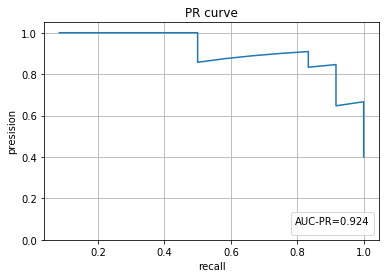

In [286]:

AUC_PR = np.sum(precision*(TPR[1:]-TPR[:-1]))
plt.title('PR curve')
plt.ylim(0, 1.05)
plt.xlabel('recall')
plt.ylabel('presision')
plt.grid()
plt.legend(' ', title=f'AUC-PR={AUC_PR:.3f}', loc='lower right')
plt.plot(recall[1:], precision)

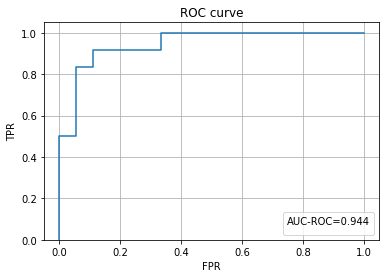

In [287]:

AUC_ROC = np.sum(0.5*(FPR[1:]-FPR[:-1])*(TPR[1:]+TPR[:-1]))
plt.title('ROC curve')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC:.3f}', loc='lower right')

plt.plot(FPR, TPR)

